**IMPORTANDO BIBLIOTECAS**

In [0]:
import numpy as np
import pandas as pd

**FUNÇÕES AUXILIARES**

In [0]:
def novos_casos(dataset):

  dataset = dataset.copy()

  for linha in range(len(dataset.values)):
    for coluna in range(dataset.values[linha].size - 1, 4, -1):                
        dataset._set_value(linha, coluna, dataset.values[linha][coluna] 
                           - dataset.values[linha][coluna-1], True)
        
  return dataset

In [0]:
def somar_datas(dataset):

  dataset = dataset.copy()

  dataset = np.sum(dataset.iloc[:,4:])
  dataset.index = pd.DatetimeIndex(dataset.index)

  return dataset

In [0]:
def plotar(dataset):
  
  df = pd.concat([somar_datas(novos_casos(dataset)), somar_datas(dataset)], axis=1)  
  df.columns = (['novos casos', 'acumulado'])
  df.plot()

**CARREGANDO DADOS DO COVID-19**

In [0]:
confirmados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
mortes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')

In [0]:
pais = 'Brazil'
confirmados = confirmados[confirmados['Country/Region'] == pais]
recuperados = recuperados[recuperados['Country/Region'] == pais]
mortes = mortes[mortes['Country/Region'] == pais]

**CASOS CONFIRMADOS DO COVID-19**

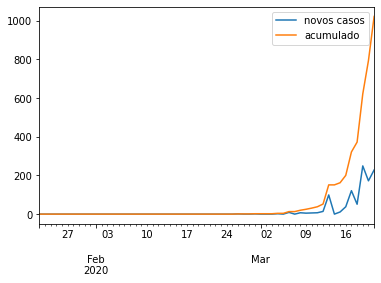

In [7]:
plotar(confirmados)

**CASOS RECUPERADOS DO COVID-19**

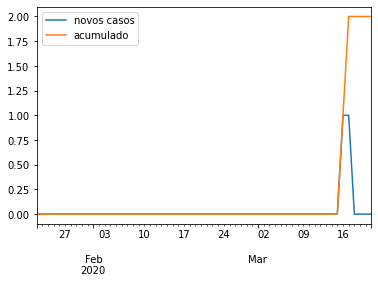

In [8]:
plotar(recuperados)

**MORTES CONFIRMADAS DO COVID-19**

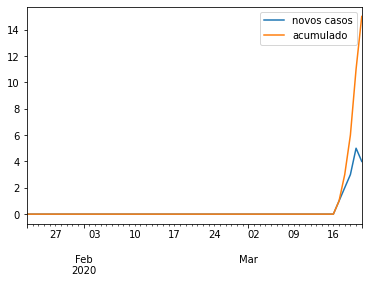

In [9]:
plotar(mortes)

**TRANSMISSORES DO COVID-19**

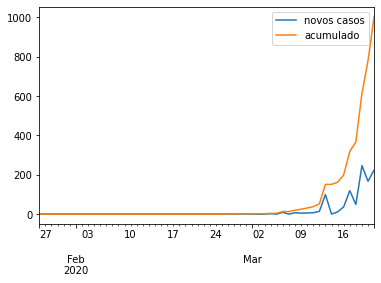

In [10]:
transmissores = confirmados.iloc[:,4:] - recuperados.iloc[:,4:] - mortes.iloc[:,4:]
plotar(transmissores)

**ACUMULADO DO COVID-19**

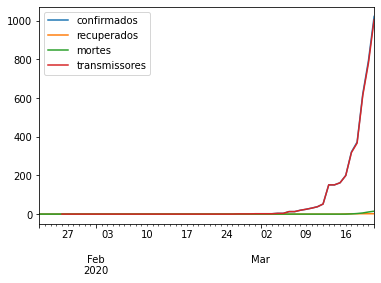

In [11]:
df = pd.concat([somar_datas(confirmados), somar_datas(recuperados), somar_datas(mortes), somar_datas(transmissores)], axis=1)  
df.columns = (['confirmados', 'recuperados', 'mortes', 'transmissores'])
df.plot()

**NOVOS CASOS DO COVID-19**

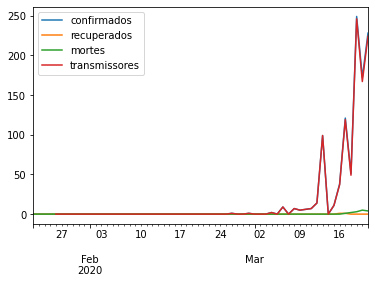

In [12]:
df = pd.concat([somar_datas(novos_casos(confirmados)), somar_datas(novos_casos(recuperados)), somar_datas(novos_casos(mortes)), somar_datas(novos_casos(transmissores))], axis=1)  
df.columns = (['confirmados', 'recuperados', 'mortes', 'transmissores'])
df.plot()